In [1]:
import pandas as pd

In [2]:
first_df = pd.read_csv('data/전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv',encoding='cp949')

In [3]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [4]:
last_df = pd.read_csv('data/주택도시보증공사_전국_평균_분양가격(2019년_12월).csv',encoding='cp949')

In [5]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [6]:
first_df.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [7]:
last_df.head(1)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841


In [8]:
#last_df nan 값이 컬럼별로 몇개가 있는지 확인

In [9]:
last_df.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [10]:
#last_df의 분양가격의 합과 평균을 구하세요

In [11]:
last_df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [12]:
print(last_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB
None


In [13]:
print(last_df['분양가격(㎡)'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 4335 entries, 0 to 4334
Series name: 분양가격(㎡)
Non-Null Count  Dtype 
--------------  ----- 
4058 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB
None


In [14]:
last_df['분양가격'] = pd.to_numeric(last_df['분양가격(㎡)'],errors='coerce') #문제가 있는 값은 NaN으로 전환
print(last_df['분양가격'].dtype)
print(last_df['분양가격'].sum(skipna=True))
print(last_df['분양가격'].mean(skipna=True))


float64
12813275.0
3238.128632802628


In [15]:
#2013~2015년 데이터는 평당 분양가격입니다. 2015~2019는 m^2당 분양가격입니다.
#2015~2019년 데이터를 평당분양가격으로 변경(컬럼 '평당분양가격'을 생성하고 넣어줍니다.)

In [16]:
last_df['평당분양가격'] = last_df['분양가격']*3.3

In [17]:
last_df.head(2)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6


In [18]:
#'규모구분'에 몇가지 종류의 값이 있는지 확인
print(last_df['규모구분'].nunique())
print(last_df['규모구분'].unique())

5
['전체' '전용면적 60㎡이하' '전용면적 60㎡초과 85㎡이하' '전용면적 85㎡초과 102㎡이하' '전용면적 102㎡초과']


In [19]:
#'규모구분'의 내용을 60m^2, 60m^2~85m^2, 85m^2~102m^2, 102m^2~ 로 변경해서 '전용면적'컬럼에 넣으세요

In [20]:
last_df['전용면적']=last_df['규모구분'].str.replace('이하','').str.replace('초과','~').str.replace('전용면적','').str.replace(' ','').str.strip()

In [21]:
print(last_df)

     지역명               규모구분    연도   월 분양가격(㎡)    분양가격   평당분양가격      전용면적
0     서울                 전체  2015  10    5841  5841.0  19275.3        전체
1     서울         전용면적 60㎡이하  2015  10    5652  5652.0  18651.6       60㎡
2     서울   전용면적 60㎡초과 85㎡이하  2015  10    5882  5882.0  19410.6   60㎡~85㎡
3     서울  전용면적 85㎡초과 102㎡이하  2015  10    5721  5721.0  18879.3  85㎡~102㎡
4     서울        전용면적 102㎡초과  2015  10    5879  5879.0  19400.7     102㎡~
...   ..                ...   ...  ..     ...     ...      ...       ...
4330  제주                 전체  2019  12    3882  3882.0  12810.6        전체
4331  제주         전용면적 60㎡이하  2019  12     NaN     NaN      NaN       60㎡
4332  제주   전용면적 60㎡초과 85㎡이하  2019  12    3898  3898.0  12863.4   60㎡~85㎡
4333  제주  전용면적 85㎡초과 102㎡이하  2019  12     NaN     NaN      NaN  85㎡~102㎡
4334  제주        전용면적 102㎡초과  2019  12    3601  3601.0  11883.3     102㎡~

[4335 rows x 8 columns]


In [22]:
#필요없는 컬럼('규모구분','분양가격(㎡)')를 제거합니다.

In [23]:
last_df.drop(columns=['규모구분','분양가격(㎡)'],inplace = True)

In [24]:
last_df

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [25]:
#groupby를 사용하여 지역별 평당분양가격의 평균 출력

In [26]:
last_df.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [27]:
#groupby를 사용하여 전용면적이 전체인 데이터만 지역별 평당분양가격의 평균 출력

In [28]:
last_df[last_df['전용면적']=='전체'].groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7477.536000
경기    12559.602000
경남     8658.672000
경북     8078.532000
광주     9903.630000
대구    11771.298000
대전     9786.018000
부산    11936.166000
서울    22610.346000
세종     9805.422000
울산    10492.712195
인천    11257.026000
전남     7283.562000
전북     7292.604000
제주    10784.994000
충남     7815.324000
충북     7219.014000
Name: 평당분양가격, dtype: float64

In [29]:
#groupby를 사용하여 전용면적별 평당분양가격의 평균 출력

In [30]:
last_df.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [31]:
#groupby를 사용하여 전용면적별, 지역별 평당분양가격의 평균 출력

In [32]:
last_df.groupby(['전용면적','지역명'])['평당분양가격'].mean()

전용면적   지역명
102㎡~  강원      8311.380000
       경기     14771.790000
       경남     10358.363265
       경북      9157.302000
       광주     11041.532432
                  ...     
전체     전남      7283.562000
       전북      7292.604000
       제주     10784.994000
       충남      7815.324000
       충북      7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [33]:
#groupby를 사용하여 지역별,전용면적별 평당분양가격의 평균 출력

In [34]:
last_df.groupby(['지역명','전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [35]:
last_df.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round(-1)

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8310.0,7570.0,7490.0,8750.0,7480.0
경기,14770.0,13250.0,12520.0,13680.0,12560.0
경남,10360.0,8690.0,8620.0,10020.0,8660.0
경북,9160.0,7880.0,8060.0,8770.0,8080.0
광주,11040.0,9430.0,9910.0,9300.0,9900.0
대구,13090.0,11990.0,11780.0,11140.0,11770.0
대전,14880.0,9180.0,9710.0,9040.0,9790.0
부산,13210.0,11350.0,11860.0,12070.0,11940.0
서울,23450.0,23210.0,22790.0,25940.0,22610.0


In [36]:
last_df.groupby(['연도','전용면적'])['평당분양가격'].mean().unstack().T

연도,2015,2016,2017,2018,2019
전용면적,,,,,
102㎡~,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968
60㎡,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371
60㎡~85㎡,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531
85㎡~102㎡,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816


In [37]:
#pivot_table 을 이용해서 지역별 평당분양가격의 평균 출력

In [38]:
last_df.columns

Index(['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [39]:
last_df.pivot_table(index=['지역명'],values=['평당분양가격'],aggfunc='mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [40]:
#pivot_table을 이용해서 전용면적별 평당분양가격의 평균

In [41]:
last_df.pivot_table(index = ['전용면적'],values = ['평당분양가격'],aggfunc='mean').round()

,평당분양가격
전용면적,
102㎡~,11518.0
60㎡,10375.0
60㎡~85㎡,10271.0
85㎡~102㎡,11098.0
전체,10276.0


In [42]:
#pivot_table을 이용해서 전용면적, 지역별 평당분양가격의 평균

In [43]:
last_df.pivot_table(index = ['전용면적','지역명'],values=['평당분양가격'],aggfunc='mean').round()

평당분양가격
전용면적  지역명         
102㎡~ 강원    8311.0
      경기   14772.0
      경남   10358.0
      경북    9157.0
      광주   11042.0
...            ...
전체    전남    7284.0
      전북    7293.0
      제주   10785.0
      충남    7815.0
      충북    7219.0

[85 rows x 1 columns]

In [44]:
last_df.pivot_table(index = ['전용면적','지역명'],values=['평당분양가격'],aggfunc='mean').round().reset_index()

,전용면적,지역명,평당분양가격
0,102㎡~,강원,8311.0
1,102㎡~,경기,14772.0
2,102㎡~,경남,10358.0
3,102㎡~,경북,9157.0
4,102㎡~,광주,11042.0
...,...,...,...
80,전체,전남,7284.0
81,전체,전북,7293.0
82,전체,제주,10785.0
83,전체,충남,7815.0


In [45]:
last_df.pivot_table(index=['전용면적'],columns=['지역명'],values=['평당분양가격'],aggfunc='mean').round()

평당분양가격                                                       \
지역명           강원       경기       경남      경북       광주       대구       대전   
전용면적                                                                    
102㎡~     8311.0  14772.0  10358.0  9157.0  11042.0  13087.0  14877.0   
60㎡       7567.0  13252.0   8689.0  7883.0   9431.0  11992.0   9176.0   
60㎡~85㎡   7486.0  12524.0   8619.0  8061.0   9911.0  11779.0   9711.0   
85㎡~102㎡  8750.0  13678.0  10018.0  8774.0   9296.0  11141.0   9037.0   
전체        7478.0  12560.0   8659.0  8079.0   9904.0  11771.0   9786.0   

                                                                       \
지역명            부산       서울       세종       울산       인천      전남      전북   
전용면적                                                                    
102㎡~     13208.0  23446.0  10107.0   9974.0  14362.0  8168.0  8194.0   
60㎡       11354.0  23213.0   9324.0   9202.0  11241.0  7210.0  7610.0   
60㎡~85㎡   11865.0  22787.0   9775.0  10503.0  11384.0  7269.0  7271.0   
85㎡~102㎡  12073.0  25944.0   9848.0   8861.0  11528.0  7909.0  8276.0   
전체        11936.0  22610.0   9805.0  10493.0  11257.0  7284.0  7293.0   

                                   
지역명            제주      충남      충북  
전용면적                               
102㎡~     10523.0  8689.0  8195.0  
60㎡       14022.0  7911.0  7103.0  
60㎡~85㎡   10621.0  7819.0  7264.0  
85㎡~102㎡  10709.0  9120.0  8391.0  
전체        10785.0  7815.0  7219.0

In [46]:
last_df.pivot_table(index=['전용면적'],columns=['지역명'],values=['평당분양가격'],aggfunc='mean').round().reset_index()

전용면적  평당분양가격                                                       \
지역명                강원       경기       경남      경북       광주       대구       대전   
0       102㎡~  8311.0  14772.0  10358.0  9157.0  11042.0  13087.0  14877.0   
1         60㎡  7567.0  13252.0   8689.0  7883.0   9431.0  11992.0   9176.0   
2     60㎡~85㎡  7486.0  12524.0   8619.0  8061.0   9911.0  11779.0   9711.0   
3    85㎡~102㎡  8750.0  13678.0  10018.0  8774.0   9296.0  11141.0   9037.0   
4          전체  7478.0  12560.0   8659.0  8079.0   9904.0  11771.0   9786.0   

                                                                           \
지역명       부산       서울       세종       울산       인천      전남      전북       제주   
0    13208.0  23446.0  10107.0   9974.0  14362.0  8168.0  8194.0  10523.0   
1    11354.0  23213.0   9324.0   9202.0  11241.0  7210.0  7610.0  14022.0   
2    11865.0  22787.0   9775.0  10503.0  11384.0  7269.0  7271.0  10621.0   
3    12073.0  25944.0   9848.0   8861.0  11528.0  7909.0  8276.0  10709.0   
4    11936.0  22610.0   9805.0  10493.0  11257.0  7284.0  7293.0  10785.0   

                     
지역명      충남      충북  
0    8689.0  8195.0  
1    7911.0  7103.0  
2    7819.0  7264.0  
3    9120.0  8391.0  
4    7815.0  7219.0

In [47]:
last_df.pivot_table(index=['연도','지역명'],values=['평당분양가격'],aggfunc='mean').round().reset_index()

,연도,지역명,평당분양가격
0,2015,강원,7188.0
1,2015,경기,11061.0
2,2015,경남,8459.0
3,2015,경북,7464.0
4,2015,광주,7917.0
...,...,...,...
80,2019,전남,8219.0
81,2019,전북,8532.0
82,2019,제주,11828.0
83,2019,충남,8749.0


In [48]:
last_df.pivot_table(index=['연도','지역명'],values=['평당분양가격'],aggfunc='mean').round().reset_index().set_index('연도')

,지역명,평당분양가격
연도,,
2015,강원,7188.0
2015,경기,11061.0
2015,경남,8459.0
2015,경북,7464.0
2015,광주,7917.0
...,...,...
2019,전남,8219.0
2019,전북,8532.0
2019,제주,11828.0


<Axes: xlabel='지역명'>

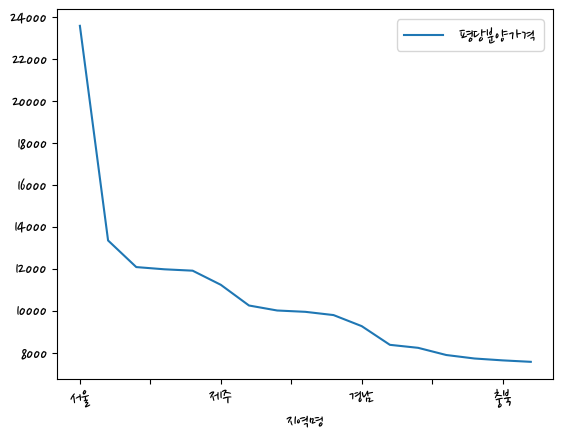

In [49]:
g = last_df.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False).to_frame()
g.plot()

<Axes: xlabel='지역명'>

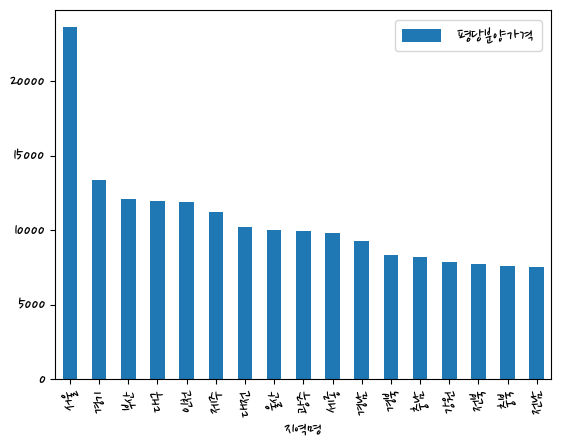

In [50]:
g.plot(kind ='bar')

<Axes: ylabel='평당분양가격'>

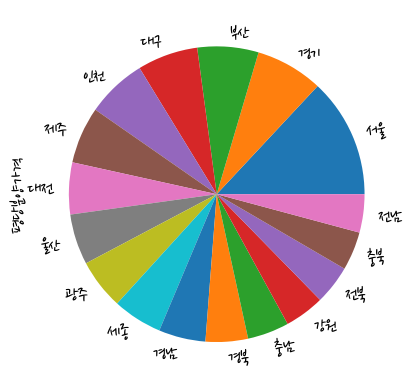

In [51]:
g['평당분양가격'].plot(kind = 'pie')

연도        2015          2016          2017          2018          2019
지역명                                                                   
강원    7188.060   7162.903846   7273.560000   8219.255000   8934.475000
경기   11060.940  11684.970000  12304.980000  14258.420000  15665.540000
경남    8459.220   8496.730000   8786.760000   9327.670000  10697.615789
경북    7464.160   7753.405000   8280.800000   8680.776923   9050.250000
광주    7916.700   9190.683333   9613.977551   9526.953333  12111.675000
대구    9018.900  10282.030000  12206.700000  12139.252632  14081.650000
대전    8190.600   8910.733333   9957.158491  10234.106667  12619.200000
부산   10377.400  10743.535000  11560.680000  12889.965000  13537.865000
서울   20315.680  21753.435000  21831.060000  23202.245000  28286.830000
세종    8765.020   8857.805000   9132.505556  10340.463158  11299.394118
울산    9367.600   9582.574138  10666.935714  10241.400000  10216.250000
인천   10976.020  11099.055000  11640.600000  11881.532143  13249.775000
전남    

<Axes: >

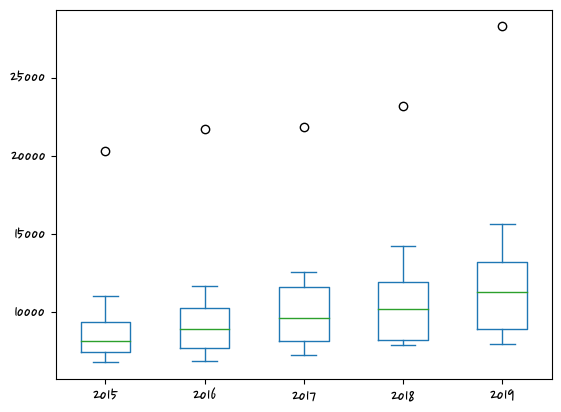

In [52]:
g=last_df.pivot_table(index = '지역명',columns='연도',values='평당분양가격')
print(g)
g.plot(kind = 'box')

In [53]:
#melt를 이용해서 월별 데이터를 '기간'컬럼으로 가격은 '평당분양가격'으로 

In [54]:
first_df.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [56]:
first_df_melt = first_df.melt(id_vars = ['지역'],var_name = '기간',value_name = '평당분양가격')
first_df_melt.head(2)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [59]:
#'기간'컬럼의 값을 '연도','월'로 분리 후 last_df와 자료형 등을 맞춰준다.

In [60]:
first_df_melt['연도'] = first_df_melt['기간'].str.split('년').str[0].astype(int)
first_df_melt['월'] = first_df_melt['기간'].str.split('년').str[1].str.replace('월','').astype(int)
first_df_melt.head(2)

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


In [61]:
#last_df에서는 전용면적이 전체인 데이터만 추출

In [64]:
last_df_result = last_df[last_df['전용면적'] == '전체']
last_df_result

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
5,인천,2015,10,3163.0,10437.9,전체
10,경기,2015,10,3138.0,10355.4,전체
15,부산,2015,10,3112.0,10269.6,전체
20,대구,2015,10,2682.0,8850.6,전체
...,...,...,...,...,...,...
4310,전북,2019,12,2468.0,8144.4,전체
4315,전남,2019,12,2452.0,8091.6,전체
4320,경북,2019,12,2914.0,9616.2,전체
4325,경남,2019,12,3063.0,10107.9,전체


In [65]:
#두 개의 데이터프레임을 하나로 합친다.

In [66]:
last_df_result.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [67]:
first_df_melt.head(1)

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [68]:
last_df_result.rename(columns = {'지역명':'지역'},inplace = True)

C:\Users\haru1367\AppData\Local\Temp\ipykernel_21288\1153188916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_df_result.rename(columns = {'지역명':'지역'},inplace = True)


In [69]:
import warnings
warnings.filterwarnings('ignore',category=) #경고를 무시

In [70]:
last_df_result.rename(columns = {'지역명':'지역'},inplace = True)

In [71]:
last_df.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [72]:
last_df_result.columns

Index(['지역', '연도', '월', '분양가격', '평당분양가격', '전용면적'], dtype='object')

In [73]:
first = first_df_melt[['지역','연도','월','평당분양가격']]
last = last_df_result[['지역','연도','월','평당분양가격']]
df = pd.concat([first,last])  #기본적으로 아래로 합친다.
df

,지역,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
